<div style="background-color: #3498db; color: #ffffff; padding: 20px; text-align: center; font-family: 'Arial', sans-serif; font-size: 36px; border-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5);">Bike Sharing System</div>


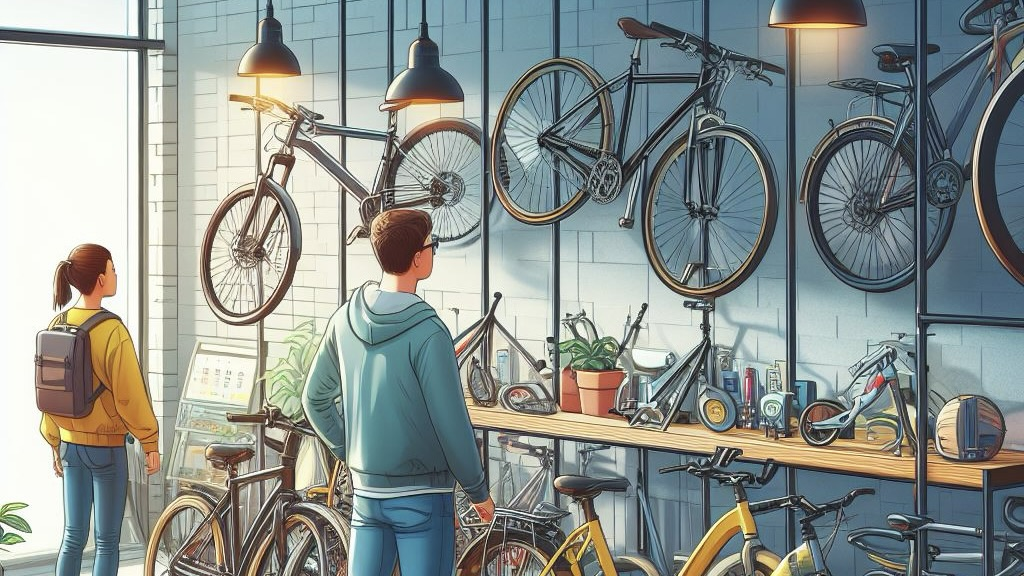

<div style="float: left; width: 20%; background-color: #3498db; color: #ffffff; padding: 10px; text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; border-top-right-radius: 10px; border-bottom-right-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5); transition: background-color 0.3s, color 0.3s; cursor: pointer;">
    Problem Statement
</div>


 A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


  A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


 In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


 They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

<div style="float: left; width: 20%; background-color: #3498db; color: #ffffff; padding: 10px; text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; border-top-right-radius: 10px; border-bottom-right-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5); transition: background-color 0.3s, color 0.3s; cursor: pointer;">
    Business Goal
</div>

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

<div style="float: left; width: 20%; background-color: #3498db; color: #ffffff; padding: 10px; text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; border-top-right-radius: 10px; border-bottom-right-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5); transition: background-color 0.3s, color 0.3s; cursor: pointer;">
    Exploratory Data Analysis
</div>

# Importing necessary libraries

In [1]:
import numpy as np              # for numercical operations
import pandas as pd             # to perform operations on dataframe
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns           # for visualisation
import missingno as msno        # to find out the missing data

import statsmodels.api as sm    # for statistical operations
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Importing RFE and LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('day.csv',encoding='utf-8') # reading the CSV in a dataframe
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
df.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729

In [4]:
df.shape # checking the shape

(730, 16)

In [5]:
df.info() # checking the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe() 

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

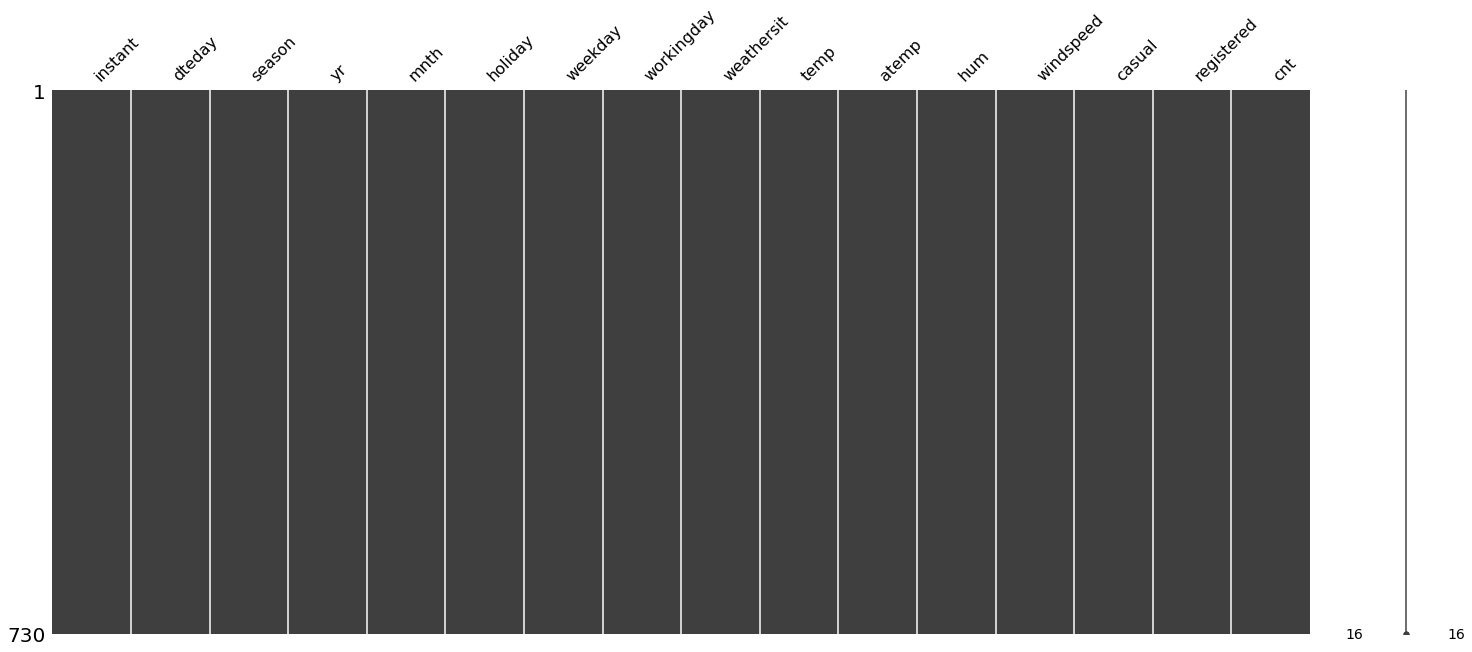

In [7]:
msno.matrix(df) # to find out the missing data
plt.show()

As we can see there is no missing values in the dataset provided

In [8]:
def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [9]:
data_info = Missing_Values(df)
data_info

#_Total_Value  #_Total_Missing_Value  %_Missing_Value_Rate  \
Variable                                                                 
instant               730                      0                   0.0   
dteday                730                      0                   0.0   
season                730                      0                   0.0   
yr                    730                      0                   0.0   
mnth                  730                      0                   0.0   
holiday               730                      0                   0.0   
weekday               730                      0                   0.0   
workingday            730                      0                   0.0   
weathersit            730                      0                   0.0   
temp                  730                      0                   0.0   
atemp                 730                      0                   0.0   
hum                   730                      0                   0.0   
windspeed             730                      0                   0.0   
casual                730                      0                   0.0   
registered            730                      0                   0.0   
cnt                   730                      0                   0.0   

           Data_Type                                       Unique_Value  \
Variable                                                                  
instant        int64  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
dteday        object  [01-01-2018, 02-01-2018, 03-01-2018, 04-01-201...   
season         int64                                       [1, 2, 3, 4]   
yr             int64                                             [0, 1]   
mnth           int64            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   
holiday        int64                                             [0, 1]   
weekday        int64                              [6, 0, 1, 2, 3, 4, 5]   
workingday     int64                                             [0, 1]   
weathersit     int64                                          [2, 1, 3]   
temp         float64  [14.110847, 14.902598, 8.050924, 8.2, 9.305237...   
atemp        float64  [18.18125, 17.68695, 9.47025, 10.6061, 11.4635...   
hum          float64  [80.5833, 69.6087, 43.7273, 59.0435, 43.6957, ...   
windspeed    float64  [10.749882, 16.652113, 16.636703, 10.739832, 1...   
casual         int64  [331, 131, 120, 108, 82, 88, 148, 68, 54, 41, ...   
registered     int64  [654, 670, 1229, 1454, 1518, 1362, 891, 768, 1...   
cnt            int64  [985, 801, 1349, 1562, 1600, 1606, 1510, 959, ...   

            Total_Unique_Value  
Variable                        
instant                    730  
dteday                     730  
season                       4  
yr                           2  
mnth                        12  
holiday                      2  
weekday                      7  
workingday                   2  
weathersit                   3  
temp                       498  
atemp                      689  
hum                        594  
windspeed                  649  
casual                     605  
registered                 678  
cnt                        695

<div style="float: left; width: 20%; background-color: #3498db; color: #ffffff; padding: 10px; text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; border-top-right-radius: 10px; border-bottom-right-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5); transition: background-color 0.3s, color 0.3s; cursor: pointer;">
    Data Preparation
</div>

In [10]:
df1=pd.read_csv('day.csv')
df1=df1.drop(['instant'],axis=1)        #dropping the instant column because it is just an index for the record


In [11]:
df1['dteday'] =  pd.to_datetime(df1['dteday'],format='%d-%m-%Y')
df1['dteday'].dtype

dtype('<M8[ns]')

In [12]:
df1['year'] = pd.DatetimeIndex(df1['dteday']).year
df1['month'] = pd.DatetimeIndex(df1['dteday']).month

In [13]:
# Dropping the columns as we have extracted the correct year and month from the date.

df1.drop(['yr','mnth'],axis=1,inplace=True)

In [14]:
df1.drop(['dteday','casual','registered'],axis=1,inplace=True) # dropping the redundant columns
df1.drop('holiday',axis=1,inplace=True)          # workingday column gives information that is required.

In [15]:
df1.head()

season  weekday  workingday  weathersit       temp     atemp      hum  \
0       1        6           0           2  14.110847  18.18125  80.5833   
1       1        0           0           2  14.902598  17.68695  69.6087   
2       1        1           1           1   8.050924   9.47025  43.7273   
3       1        2           1           1   8.200000  10.60610  59.0435   
4       1        3           1           1   9.305237  11.46350  43.6957   

   windspeed   cnt  year  month  
0  10.749882   985  2018      1  
1  16.652113   801  2018      1  
2  16.636703  1349  2018      1  
3  10.739832  1562  2018      1  
4  12.522300  1600  2018      1

`In our data we see that the column season is as follows` 

> 1. season : season (1: spring, 2: summer, 3: fall, 4: winter)
> 2. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
> 3. weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
> 4. months : 1 to 12 ( Jan to Dec)

so we will map the lables properly

In [16]:
season = {1:'spring',2:'summer',3:'fall',4:'winter'}
weathersit = {1: 'Clear',2: 'Mist',3: 'Light Snow',4: 'Heavy Rain'}
workingday = {1:'working_day',0:'Holiday'}
weekday = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}



df1['season'] = df1['season'].map(season)
df1['workingday']=df1['workingday'].map(workingday)
df1['weekday']=df1['weekday'].map(weekday)
df1['weathersit']=df1['weathersit'].map(weathersit)
df1['month'] = df1['month'].map(month)

In [17]:
df1.head()

season weekday   workingday weathersit       temp     atemp      hum  \
0  spring     Sun      Holiday       Mist  14.110847  18.18125  80.5833   
1  spring     Mon      Holiday       Mist  14.902598  17.68695  69.6087   
2  spring     Tue  working_day      Clear   8.050924   9.47025  43.7273   
3  spring     Wed  working_day      Clear   8.200000  10.60610  59.0435   
4  spring     Thu  working_day      Clear   9.305237  11.46350  43.6957   

   windspeed   cnt  year month  
0  10.749882   985  2018   Jan  
1  16.652113   801  2018   Jan  
2  16.636703  1349  2018   Jan  
3  10.739832  1562  2018   Jan  
4  12.522300  1600  2018   Jan

In [18]:
df1.shape

(730, 11)

<div style="float: left; width: 20%; background-color: #3498db; color: #ffffff; padding: 10px; text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; border-top-right-radius: 10px; border-bottom-right-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5); transition: background-color 0.3s, color 0.3s; cursor: pointer;">
    Univariate Analysis
</div>

`Univariate analysis involves examining a single variable in isolation to understand its distribution, central tendency, and variability.`

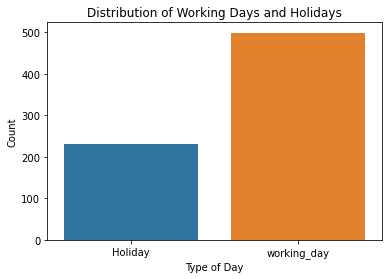

In [19]:
# Countplot for Working Days vs. Holidays
sns.countplot(data=df1, x='workingday')
plt.title('Distribution of Working Days and Holidays')
plt.xlabel('Type of Day')
plt.ylabel('Count')
plt.show()

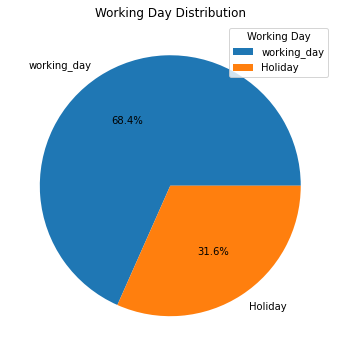

In [20]:
plt.figure(figsize=(10, 6))
working_counts = df1['workingday'].value_counts()

# Create the pie chart with the correct labels
plt.pie(working_counts, labels=working_counts.index, autopct='%1.1f%%')

# Add a legend
plt.legend(working_counts.index, title="Working Day")

plt.title('Working Day Distribution')
plt.show()

- As we can see customers have used 68.4% rental during the working days whereas 31.6% on weekends or holidays.
- This maybe due to the working professionals renting the bikes to commute.
- People usually tend to relax themselves at home on weekends or holidays

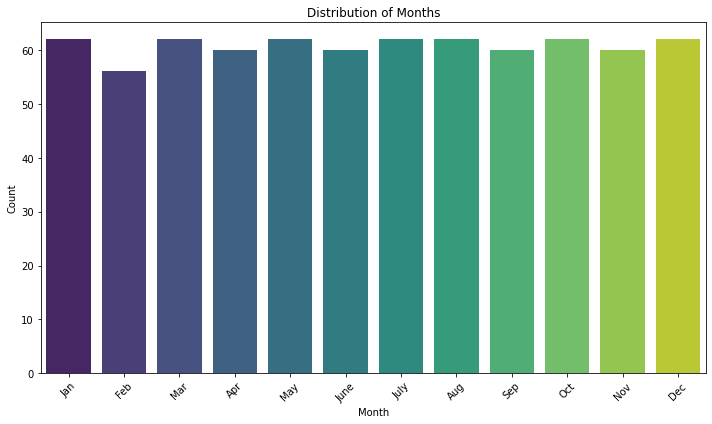

In [21]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df1, x='month', palette='viridis')
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Improve spacing between plot elements
plt.show()

- We can see a dip in the rental in Febraury.
- We can even see almost alternate months taking a dip in the rental.

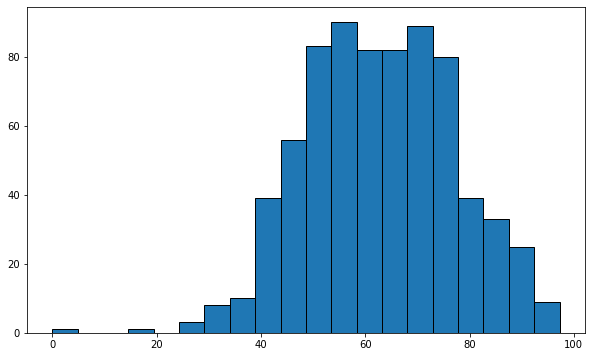

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df1['hum'].dropna(), bins=20, edgecolor='black')
plt.show()


<div style="float: left; width: 20%; background-color: #3498db; color: #ffffff; padding: 10px; text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; border-top-right-radius: 10px; border-bottom-right-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5); transition: background-color 0.3s, color 0.3s; cursor: pointer;">
    Bivariate Analysis 
</div>


`Bivariate analysis involves analyzing the relationship between two variables to understand their interactions and correlations.`



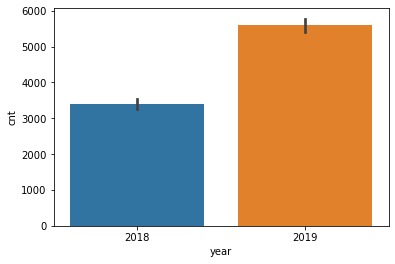

In [23]:
sns.barplot(x='year',y='cnt',data=df1)
plt.show()

Bike Rental popularity has increased in 2019 when compared to 2018.

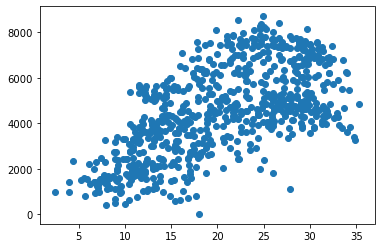

In [24]:
plt.scatter(x='temp',y='cnt',data=df1)
plt.show()

There is a linear relationship between temperature and count

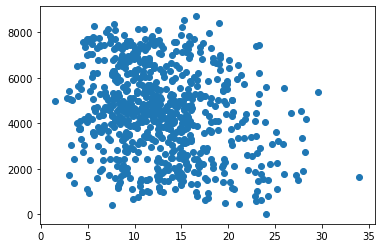

In [25]:
plt.scatter(x='windspeed',y='cnt',data=df1)
plt.show()

As the wind speeds increase with a greater temperature difference.Wind speed near the surface is most highly correlated with the temperature

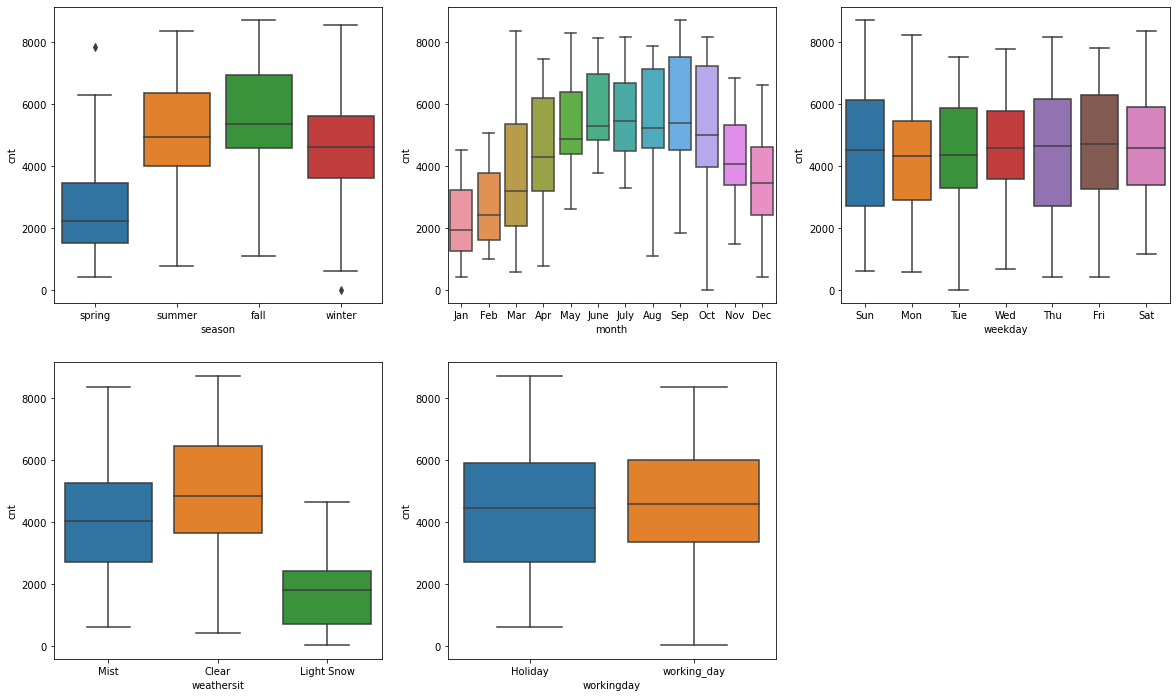

In [26]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df1)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = df1)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df1)
plt.show()

<div style="float: left; width: 20%; background-color: #3498db; color: #ffffff; padding: 10px; text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; border-top-right-radius: 10px; border-bottom-right-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5); transition: background-color 0.3s, color 0.3s; cursor: pointer;">
    Multivariate Analysis 
</div>


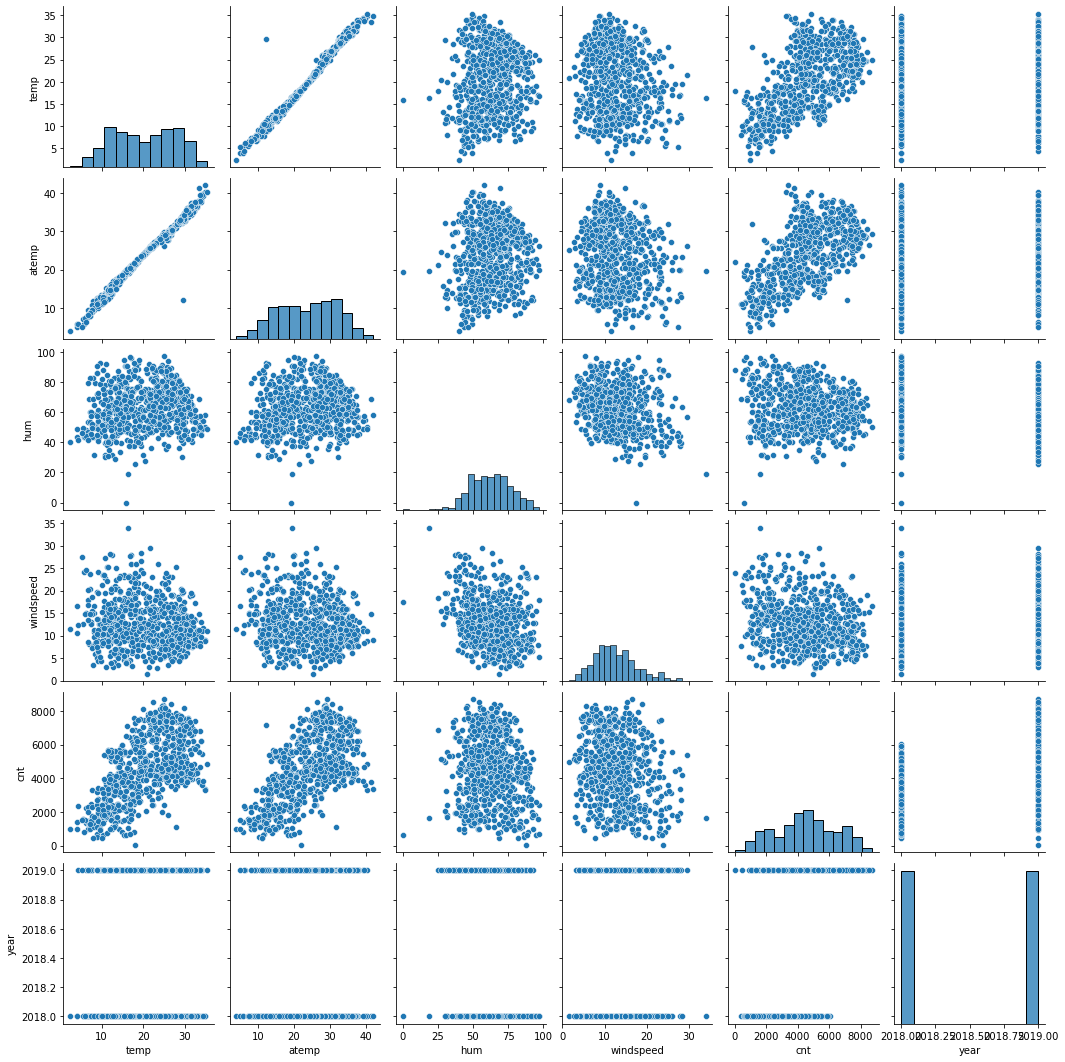

In [27]:
sns.pairplot(df1)
plt.show()

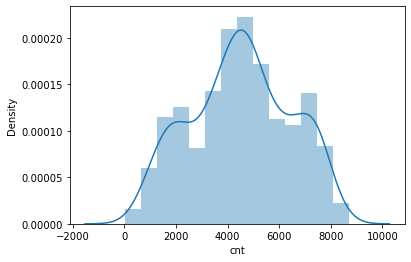

In [28]:
sns.distplot(df1['cnt'])
plt.show()


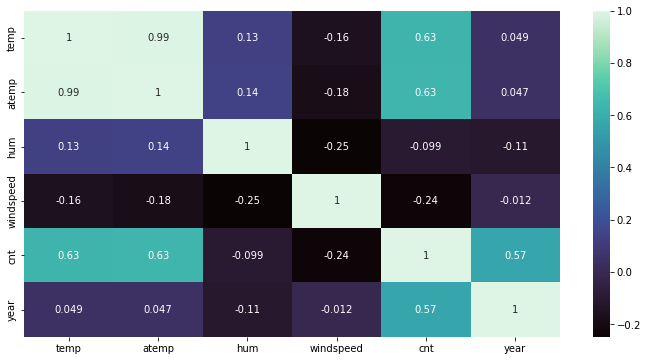

In [29]:
plt.figure(figsize = (12,6))
sns.heatmap(df1.corr(),annot=True,cmap="mako")
plt.show()

It is observed that the column atemp and temp both are highly correlated , we can drop one of these to prevent multicolinearity

In [30]:
df1.drop('atemp',axis=1,inplace=True)

In [31]:
df1.nunique()

season          4
weekday         7
workingday      2
weathersit      3
temp          498
hum           594
windspeed     649
cnt           695
year            2
month          12
dtype: int64

In [32]:
df1.head()

season weekday   workingday weathersit       temp      hum  windspeed  \
0  spring     Sun      Holiday       Mist  14.110847  80.5833  10.749882   
1  spring     Mon      Holiday       Mist  14.902598  69.6087  16.652113   
2  spring     Tue  working_day      Clear   8.050924  43.7273  16.636703   
3  spring     Wed  working_day      Clear   8.200000  59.0435  10.739832   
4  spring     Thu  working_day      Clear   9.305237  43.6957  12.522300   

    cnt  year month  
0   985  2018   Jan  
1   801  2018   Jan  
2  1349  2018   Jan  
3  1562  2018   Jan  
4  1600  2018   Jan

# Dealing With Categorical Variables

In [33]:
seasons = pd.get_dummies(df1['season'],drop_first=True)

working_day = pd.get_dummies(df1['workingday'],drop_first=True)

weather= pd.get_dummies(df1['weathersit'],drop_first=True)

month= pd.get_dummies(df1['month'],drop_first=True)

week_day= pd.get_dummies(df1['weekday'],drop_first=True)

In [34]:
df1= pd.concat([df1,seasons,working_day,weather,month,week_day],axis=1)

In [35]:
df1.head()

season weekday   workingday weathersit       temp      hum  windspeed  \
0  spring     Sun      Holiday       Mist  14.110847  80.5833  10.749882   
1  spring     Mon      Holiday       Mist  14.902598  69.6087  16.652113   
2  spring     Tue  working_day      Clear   8.050924  43.7273  16.636703   
3  spring     Wed  working_day      Clear   8.200000  59.0435  10.739832   
4  spring     Thu  working_day      Clear   9.305237  43.6957  12.522300   

    cnt  year month  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  
0   985  2018   Jan  ...    0    0    0    0    0    0    1    0    0    0  
1   801  2018   Jan  ...    0    0    0    0    1    0    0    0    0    0  
2  1349  2018   Jan  ...    0    0    0    0    0    0    0    0    1    0  
3  1562  2018   Jan  ...    0    0    0    0    0    0    0    0    0    1  
4  1600  2018   Jan  ...    0    0    0    0    0    0    0    1    0    0  

[5 rows x 33 columns]

In [36]:
# Dropping the categorical variables as they are already dummy-encoded.

df1.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [37]:
df1.head()

temp      hum  windspeed   cnt  year  spring  summer  winter  \
0  14.110847  80.5833  10.749882   985  2018       1       0       0   
1  14.902598  69.6087  16.652113   801  2018       1       0       0   
2   8.050924  43.7273  16.636703  1349  2018       1       0       0   
3   8.200000  59.0435  10.739832  1562  2018       1       0       0   
4   9.305237  43.6957  12.522300  1600  2018       1       0       0   

   working_day  Light Snow  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  \
0            0           0  ...    0    0    0    0    0    0    1    0    0   
1            0           0  ...    0    0    0    0    1    0    0    0    0   
2            1           0  ...    0    0    0    0    0    0    0    0    1   
3            1           0  ...    0    0    0    0    0    0    0    0    0   
4            1           0  ...    0    0    0    0    0    0    0    1    0   

   Wed  
0    0  
1    0  
2    0  
3    1  
4    0  

[5 rows x 28 columns]

# Splitting the Data into Training and Testing Sets

In [38]:
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

<div style="float: left; width: 20%; background-color: #3498db; color: #ffffff; padding: 10px; text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; border-top-right-radius: 10px; border-bottom-right-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5); transition: background-color 0.3s, color 0.3s; cursor: pointer;">
    Feature Scaling
</div>

In [39]:
scaler= StandardScaler()

- Standardization does not have a predefined range; it aims to center the data around 0 and set the standard deviation to 1.Standardization does not have a predefined range; it aims to center the data around 0 and set the standard deviation to 1.
- Standardization is more robust to outliers because it uses the mean and standard deviation, which are less affected by extreme values.

In [40]:
# Applying scaler() to all the columns except the'dummy' variables.

num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

##### splitting into x and y

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

<div style="float: left; width: 20%; background-color: #3498db; color: #ffffff; padding: 10px; text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; border-top-right-radius: 10px; border-bottom-right-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5); transition: background-color 0.3s, color 0.3s; cursor: pointer;">
    Feature Selection
</div>

# Model 1

### Recursive feature elimination(RFE)

In [42]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', True, 1),
 ('Thu', False, 16),
 ('Tue', False, 12),
 ('Wed', False, 13)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [45]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [46]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [47]:
# calculate VIF

calculateVIF(X_train_rfe)

Features    VIF
1         year  40.85
3  working_day  27.90
9          Sun   7.15
8          Mon   6.68
2       spring   2.14
0         temp   2.00
5         Mist   1.59
6         July   1.38
7          Sep   1.19
4   Light Snow   1.06

In [48]:
#adding the constant fot "statsmodels" and then fitting the linear model for training dataset
X_train_rfe = X_train[col] 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit() 

In [49]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.30e-179
Time:                        07:26:54   Log-Likelihood:                -285.08
No. Observations:                 510   AIC:                             592.2
Df Residuals:                     499   BIC:                             638.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2109.6624     77.201    -27.327      0.000   -2261.341   -1957.983
temp            0.3984      0.027     14.773      0.000       0.345       0.451
year            1.0451      0.038     27.326      0.000       0.970       1.120
spring         -0.6819      0.056    -12.116      0.000      -0.792      -0.571
working_day     0.4421      0.122      3.633      0.000       0.203       0.681
Light Snow     -1.3226      0.114    -11.586      0.000      -1.547      -1.098
Mist           -0.3671      0.041     -8.999      0.000      -0.447      -0.287
July           -0.3011      0.081     -3.734      0.000      -0.460      -0.143
Sep             0.2845      0.073      3.900      0.000       0.141       0.428
Mon             0.2462      0.129      1.902      0.058      -0.008       0.500
Sun             0.4841      0.129      3.762      0.000       0.231       0.737
==============================================================================
Omnibus:                       59.973   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.538
Skew:                          -0.597   Prob(JB):                     4.57e-34
Kurtosis:                       5.408   Cond. No.                     8.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 2

#### Dropping Mon as it is insignificant.

In [50]:
X_train1= X_train_rfe.drop('Mon',axis=1)

In [51]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [52]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.22e-179
Time:                        07:26:55   Log-Likelihood:                -286.92
No. Observations:                 510   AIC:                             593.8
Df Residuals:                     500   BIC:                             636.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2110.8056     77.401    -27.271      0.000   -2262.876   -1958.735
temp            0.3999      0.027     14.797      0.000       0.347       0.453
year            1.0458      0.038     27.273      0.000       0.970       1.121
spring         -0.6842      0.056    -12.129      0.000      -0.795      -0.573
working_day     0.2327      0.052      4.476      0.000       0.131       0.335
Light Snow     -1.3185      0.114    -11.522      0.000      -1.543      -1.094
Mist           -0.3647      0.041     -8.922      0.000      -0.445      -0.284
July           -0.2972      0.081     -3.676      0.000      -0.456      -0.138
Sep             0.2757      0.073      3.777      0.000       0.132       0.419
Sun             0.2749      0.067      4.102      0.000       0.143       0.407
==============================================================================
Omnibus:                       62.219   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.183
Skew:                          -0.617   Prob(JB):                     1.65e-35
Kurtosis:                       5.452   Cond. No.                     8.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
X_train_new= X_train2.drop('const',axis=1)

In [54]:
calculateVIF(X_train_new)

Features   VIF
1         year  7.11
3  working_day  5.07
2       spring  2.14
0         temp  2.00
8          Sun  1.93
5         Mist  1.59
6         July  1.38
7          Sep  1.19
4   Light Snow  1.06

##  Residual Analysis of the train data

In [55]:
y_train_pred = lm1.predict(X_train2)

Text(0.5, 0, 'Errors')

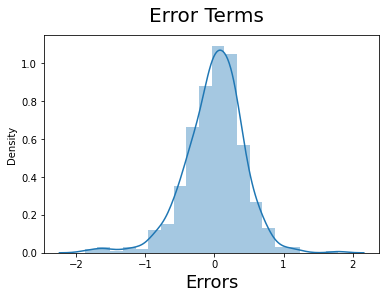

In [56]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

In [57]:
num_vars=['temp','hum','windspeed','cnt']

df_test[num_vars]= scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [58]:
y_test = df_test.pop('cnt')
X_test = df_test

In [59]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [60]:
# Making predictions
y_test_pred = lm1.predict(X_test_new)

<div style="float: left; width: 20%; background-color: #3498db; color: #ffffff; padding: 10px; text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; border-top-right-radius: 10px; border-bottom-right-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5); transition: background-color 0.3s, color 0.3s; cursor: pointer;">
    Model Evaluation
</div>

Text(0, 0.5, 'Predictions')

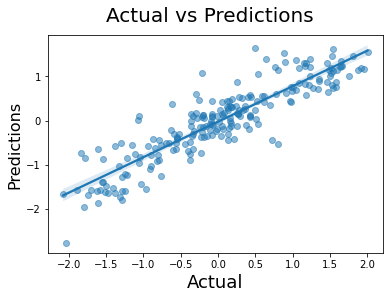

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha':0.5})
fig.suptitle('Actual vs Predictions', fontsize=20)    # Plot heading 
plt.xlabel('Actual', fontsize=18)                     # X-label
plt.ylabel('Predictions', fontsize=16)                # Y-label

In [62]:

r2_score(y_train, y_train_pred)

0.8196225891133859

In [63]:


from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8075114920781534

<div style="float: left; width: 20%; background-color: #3498db; color: #ffffff; padding: 10px; text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; border-top-right-radius: 10px; border-bottom-right-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5); transition: background-color 0.3s, color 0.3s; cursor: pointer;">
    Conclusion
</div>




`The key questions to address in this project are:`


1. Identify the significant variables affecting bike demand.
2. Evaluate how well these variables explain the variation in bike demand.


1. `The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:`
-  Year
-  Spring season 
-  Temperature 
-  Mist 
-  Sun 


2. We see that the `R2 score from the train data is 0.82 and from the test data it is 0.80.`
- Overall, an R2 score of 0.80 on the test data is a positive sign. 
- It indicates that the model is performing well in terms of explaining the variation in the target variable and that it is not overfitting (i.e., it generalizes well to new data). 
- However, it's important to consider the domain knowledge to determine whether these R2 scores are satisfactory for our application.

## Assumptions of Linear Regression

- The residuals follow a normal distribution.
- The training and testing accuracies are closely matched, Hence no overfitting or underfitting.
- The predicted values have linear relationship with the actual values.

<div style="background-color: #3498db; color: #ffffff; padding: 20px; text-align: center; font-family: 'Arial', sans-serif; font-size: 36px; border-radius: 10px; box-shadow: 3px 3px 5px 0px rgba(0,0,0,0.5);">Thank You</div>
